<h1><Bold>Movie Recommendation </Bold></h1>

<h1>Packages Used</h1>

In [1]:

import requests
import json
from time import sleep
from random import random 
import pandas as pd
import re
import numpy as np
import nltk
from PIL import Image 
import wordcloud as w
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
import string
import matplotlib.pyplot as plt
import datetime
import folium
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
!pip install plotly
import plotly.graph_objects as go
%matplotlib inline

<h1>Webscraping Data from TMDB</h1>
<ul>Please do not run the below codes. Use these lines of code to extract data using TMDB API.</ul>
<ul>Please move on to the "Combining Extacted Data" code block</ul>

In [ ]:
# #1. getting a list of genres
# url_genre= 'https://api.themoviedb.org/3/genre/movie/list?api_key=-----&language=en-US'
# l=json.loads(requests.get(url_genre).content.decode('utf-8'))
# g_id=[]
# for i in l['genres']:
#     g_id.append(i['id'])
# genres_list=[]
# id_list=[]
# for i in l['genres']:
#     id_list.append(i['id'])
#     genres_list.append(i['name'])
# genres=pd.DataFrame(data=list(zip(id_list,genres_list)),columns=['genre_id','genre'])
# genres

In [ ]:
# #code for scraping the data 
# #This has to be run only for scraping!!!! not otherwise 
# #using the 'discover' API of tmdb to get the list of movies 
# #Ran for 6 months at a time for efficiency purposes
# url_movies='https://api.themoviedb.org/3/discover/movie?api_key=-----&include_video=false&page=p&primary_release_date.gte=2018-10-01&primary_release_date.lte=2018-12-31'
# #getting the results of page one
# first_page=json.loads(requests.get(url_movies).content.decode('utf-8'))                       
# results=[]
# total_pages=first_page['total_pages'] #get the total pages so that we know how many times the loop has to be executed
# print(total_pages)
# for i in range(total_pages):
#     print(i)
#     sleep(random())
#     page=json.loads(requests.get(url_movies+'&page=%s'%(i+1)).content.decode('utf-8')) 
#     r=page['results']
#     for j in r:
#         f=j['id']
#         #print(f)
#         sleep(random())
#         url='https://api.themoviedb.org/3/movie/%s/credits?api_key=-----' % f
#         d=json.loads(requests.get(url).content.decode('utf-8'))
#         sleep(random())
#         url='https://api.themoviedb.org/3/movie/%s?api_key=-----' % f
#         d.update(json.loads(requests.get(url).content.decode('utf-8')))
#         results.append(d)


<h1>Combining Extracted Data</h1>

In [2]:
outF=open("movies.txt", "r") 
d=outF.readlines()
df1= pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df1)

outF=open("movies_1.txt", "r") 
d=outF.readlines()
df2= pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df2)

outF=open("movies_apr18_sep18_i-247.txt", "r") 
d=outF.readlines()
df3= pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df3)


outF=open("movies_apr18_sep18_i-248_292.txt", "r") 
d=outF.readlines()
df4= pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df4)

outF=open("movies_apr18_sep18_i-293_416.txt", "r") 
d=outF.readlines()
df5= pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df5)


outF=open("first.txt", "r") 
d=outF.readlines()
df6= pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df6)

outF=open("second.txt", "r") 
d=outF.readlines()
df7= pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df7)

outF=open("third.txt", "r") 
d=outF.readlines()
df8=pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df8)

outF=open("fourth.txt", "r") 
d=outF.readlines()
df9= pd.DataFrame.from_dict(json.loads(d[0]), orient='columns')
len(df9)

#creating the final dataset

df_merged1 = pd.concat([df1,df2], axis=0, sort = False)
df_merged2 = pd.concat([df_merged1,df3], axis=0, sort = False)
df_merged3 = pd.concat([df_merged2,df4], axis=0, sort = False)
df_merged4 = pd.concat([df_merged3,df5], axis=0, sort = False)
df_merged5 = pd.concat([df_merged4,df6], axis=0, sort = False)
df_merged6 = pd.concat([df_merged5,df7], axis=0, sort = False)
df_merged7 = pd.concat([df_merged6,df8], axis=0, sort = False)
final_df = pd.concat([df_merged7,df9], axis=0, sort = False)

#Reset the index
final_df.reset_index(inplace=True)
final_df.index


RangeIndex(start=0, stop=35536, step=1)

<h1>Data Cleaning </h1>

In [ ]:
#Looking at Dataset
# print(len(final_df.index))
# print(final_df.columns)
# print(final_df.info())

In [3]:
#Cleaning Data
def cleaning_data(df):
    rows = len(df)
    print(f'No. of rows in the original: {rows}')
    #flag for all nas
    df['flag_all_na'] = np.where(df['id'].isna() == True, 1, 0)
    print(f'Rows dropped due to all Nas: {df.flag_all_na.sum()}')
    #flag for empty genres
    df['flag_genre'] = 0
    for i in range(len(df['genres'])):
        if df['flag_all_na'][i] != 1:
            if len(df['genres'][i]) == 0:
                df['flag_genre'][i] = 1
    print(f'Rows dropped due to empty genres: {df.flag_genre.sum()}')
    #flag for empty release_date
    df['flag_date'] = np.where(df['release_date'] == '',1,0)
    print(f'Rows dropped due to empty dates: {df.flag_date.sum()}')
    #deleting the flagged rows
    df = df[(df.flag_all_na == 0) & (df.flag_genre == 0) & (df.flag_date == 0)]
    #keeping unique movie ids
    df = df.drop_duplicates(subset='id')
    #flag for duplicated movie titles
    df.set_index('id')
    dupes = list(df[df.duplicated(['title'])==True]['title'])
    dupe_ids = []
    keep_us = []
    for i in dupes:
        dupe_ids.extend(list(df[df['title']==i].index))
        keep_us.append(df[df['title']==i]['vote_average'].idxmax())
    remove_us = list(set(dupe_ids) - set(keep_us))
    len_ = len(remove_us)
    print(f'Rows dropped due to duplicate titles: {len_}')
    df=df.drop(remove_us)
    #creating month and year columns
    df['Date_R'] = df['release_date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))
    df['Year'] = df['Date_R'].apply(lambda x:x.year)
    df['Month'] = df['Date_R'].apply(lambda x:x.month)
    
    #dropping the flag columns
    df = df.drop(columns=['flag_all_na', 'flag_genre', 'flag_date'])
    cleaned_row = len(df)
    print(f'Final number of rows in our dataset:{cleaned_row}')
    
    return df


In [4]:
cleaned_data = cleaning_data(final_df)
cleaned_data.reset_index(inplace=True)
cleaned_data.drop(columns=['level_0', 'index'])

No. of rows in the original: 35536
Rows dropped due to all Nas: 7


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Rows dropped due to empty genres: 8958
Rows dropped due to empty dates: 10
Rows dropped due to duplicate titles: 692
Final number of rows in our dataset:25870


,id,cast,crew,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,imdb_id,...,tagline,title,video,vote_average,vote_count,status_code,status_message,Date_R,Year,Month
0,476631.0,"[{'cast_id': 0, 'character': 'Barbie', 'credit...","[{'credit_id': '59c14af89251417dea017860', 'de...",False,/5Sbv4UlC6M2Jsf3t1Bw88LUSwyU.jpg,"{'id': 517758, 'name': 'Barbie Collection', 'p...",0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",None,tt7130740,...,,Barbie: Dolphin Magic,False,6.6,79.0,NaN,NaN,2017-10-13,2017,10
1,284053.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '5acff84c0e0a267495004256', 'de...",False,/kaIfm5ryEOwYg8mLbq8HkPuM1Fo.jpg,"{'id': 131296, 'name': 'Thor Collection', 'pos...",180000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://marvel.com/movies/movie/222/thor_ragnarok,tt3501632,...,No Hammer. No Problem.,Thor: Ragnarok,False,7.5,12535.0,NaN,NaN,2017-10-25,2017,10
2,181808.0,"[{'cast_id': 14, 'character': 'Luke Skywalker ...","[{'credit_id': '52fe4c709251416c7511a87b', 'de...",False,/5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",200000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",https://www.starwars.com/films/star-wars-episo...,tt2527336,...,Darkness rises... and light to meet it,Star Wars: The Last Jedi,False,7.0,9246.0,NaN,NaN,2017-12-13,2017,12
3,335984.0,"[{'cast_id': 14, 'character': 'K', 'credit_id'...","[{'credit_id': '59d8f4d2c3a36861ec028eb2', 'de...",False,/8QXGNP0Vb4nsYKub59XpAhiUSQN.jpg,"{'id': 422837, 'name': 'Blade Runner Collectio...",150000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://bladerunnermovie.com/,tt1856101,...,The key to the future is finally unearthed.,Blade Runner 2049,False,7.4,7347.0,NaN,NaN,2017-10-04,2017,10
4,284054.0,"[{'cast_id': 0, 'character': 'King T’Challa / ...","[{'credit_id': '578f9c79c3a3685b50002489', 'de...",False,/6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg,"{'id': 529892, 'name': 'Black Panther Collecti...",200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://marvel.com/movies/movie/224/black_panther,tt1825683,...,Long live the king.,Black Panther,False,7.4,13661.0,NaN,NaN,2018-02-13,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25865,648634.0,[],[],False,None,None,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 80,...",https://www.zmonescinema.lt/lt/filmas/pirmieji...,None,...,,Pirmieji kovotojai su mafija,False,0.0,0.0,NaN,NaN,2019-04-18,2019,4
25866,648528.0,"[{'cast_id': 2, 'character': 'Babi', 'credit_i...","[{'credit_id': '5dcfe11b79a1c300134b6d76', 'de...",False,None,None,0.0,"[{'id': 99, 'name': 'Documentary'}]",None,None,...,,Babi & Elvis,False,0.0,0.0,NaN,NaN,2019-10-30,2019,10
25867,648376.0,"[{'cast_id': 4, 'character': 'Ahn Bo-ryeong', ...","[{'credit_id': '5dcec14479a1c3001049b1bf', 'de...",False,None,None,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",None,None,...,"[Breaking News] Former Announcer, Current YouT...",Judgment Night,False,0.0,0.0,NaN,NaN,2019-06-13,2019,6
25868,648357.0,"[{'cast_id': 1, 'character': '', 'credit_id': ...","[{'credit_id': '5dce976fcc277c0012e5317d', 'de...",False,None,None,0.0,"[{'id': 99, 'name': 'Documentary'}]",None,None,...,,Autodefense Gynecology,False,0.0,0.0,NaN,NaN,2019-10-23,2019,10


In [ ]:
#Looking at Cleaned Dataset
# print(cleaned_data.index)
# print(cleaned_data.columns)
# print(cleaned_data.info())
# final_rows = len(cleaned_data)
# final_columns = len(cleaned_data.columns)
# print(final_rows, final_columns)
# print(len(cleaned_data.id.unique()))

Create Dimension Tables
<ul>Will take some time to finish running</ul>

In [5]:
#creating some dimension tables:
#Cast of the movie
#Genres
#Director of the movie
#Production country of the movie

def dimension_table(df):
    #creating cast dimension table
    cast_list = []
    for i in range(len(df)):
        for d in df.iloc[i]['cast']:
            cast_list.append([df.iloc[i]['id'],d['id'], d['name'], df.iloc[i]['vote_average']])
    c_id_list = [i[0] for i in cast_list]
    c_actor_id = [i[1] for i in cast_list]
    c_actor_name = [i[2] for i in cast_list]
    c_vote_average = [i[3] for i in cast_list]
    if (len(c_id_list) == len(c_actor_id) == len(c_actor_name) == len(c_vote_average)) != True:
        print('Error while creating cast dimension table. Please check.')
    else:
        cast_df = pd.DataFrame(columns = ['movie_id', 'actor_id', 'actor_name', 'vote_average'])
        cast_df['movie_id'] = c_id_list
        cast_df['actor_id'] = c_actor_id
        cast_df['actor_name'] = c_actor_name
        cast_df['vote_average'] = c_vote_average
        
    #creating genre dimension table
    genre_list = []
    for i in range(len(df)):
        for d in df.iloc[i]['genres']:
            genre_list.append([df.iloc[i]['id'],d['id'], d['name']]) 
    g_id_list = [i[0] for i in genre_list]
    g_genre_id = [i[1] for i in genre_list]
    g_genre_name = [i[2] for i in genre_list]
    if (len(g_id_list) == len(g_genre_id) == len(g_genre_name)) != True:
        print('Error while creating genre dimension table. Please check.')
    else:
        genre_df = pd.DataFrame(columns = ['movie_id', 'genre_id', 'genre_name'])
        genre_df['movie_id'] = g_id_list
        genre_df['genre_id'] = g_genre_id
        genre_df['genre_name'] = g_genre_name
        
    #creating director dimension table
    director_list = []
    for i in range(len(df)):
        for d in df.iloc[i]['crew']:
            if d['job'] == 'Director':
                director_list.append([df.iloc[i]['id'],d['name']])
    d_id_list = [i[0] for i in director_list]
    d_director_name = [i[1] for i in director_list]
    if (len(d_id_list) == len(d_director_name)) !=True:
        print('Error while creating director dimension table. Please check.')
    else:
        director_df = pd.DataFrame(columns = ['movie_id', 'director_name'])
        director_df['movie_id'] = d_id_list
        director_df['director_name'] = d_director_name
    
    #creating production country dimension table
    prod_country_list = []
    for i in range(len(df)):
        for d in df.iloc[i]['production_countries']:
            prod_country_list.append([df.iloc[i]['id'],d['name']])

    p_id_list = [i[0] for i in prod_country_list]
    p_prod_country = [i[1] for i in prod_country_list]
    if (len(p_id_list) == len(p_prod_country)) != True:
        print('Error while creating production country dimension table. Please check.')
    else:
        prod_country_df = pd.DataFrame(columns = ['movie_id', 'production_country'])
        prod_country_df['movie_id'] = p_id_list
        prod_country_df['production_country'] = p_prod_country
        
    #creating overview dimension
    overview_df = df[['id', 'title', 'overview', 'genres']]
    overview_df.set_index('id', inplace=True)
    
        
    return cast_df, genre_df, director_df, prod_country_df, overview_df

In [6]:
cast_df, genre_df, director_df, prod_country_df, overview_df = dimension_table(cleaned_data)

<h1>Data Visualizations</h1>
<ul>
    <li>Movie releases by month</li>
    <li>Count by genre</li>
    <li>Top 6 movies for top 6 genres</li>
    <li>Word cloud</li>
    <li>Revenue by genre</li>
  </ul>

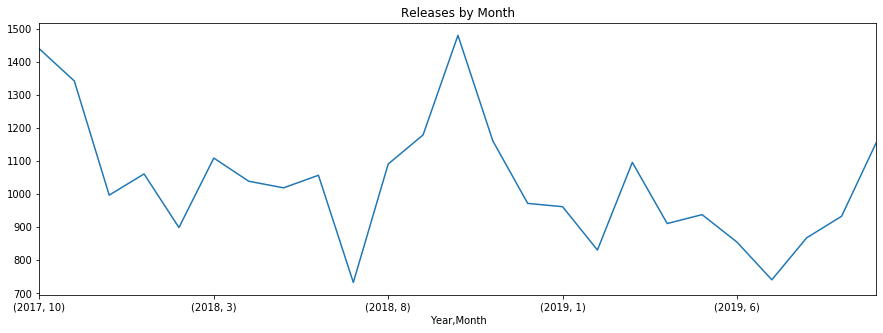

In [9]:
#2. Month-Year Plot for count of movies released
cleaned_data.groupby(['Year', 'Month']).size().plot(title='Releases by Month', figsize=(15,5))

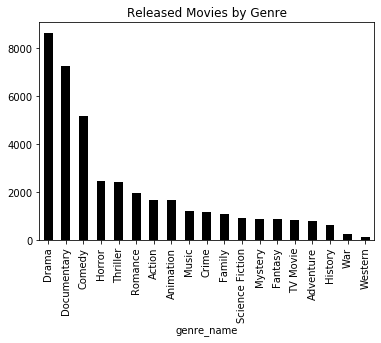

In [10]:
#3. Genres bar chart
graph0 = genre_df.groupby('genre_name').size().sort_values(ascending=False).plot(kind='bar',title='Released Movies by Genre', color='k')
fig = graph0.get_figure()
fig.savefig("graph0.png",bbox_inches='tight')


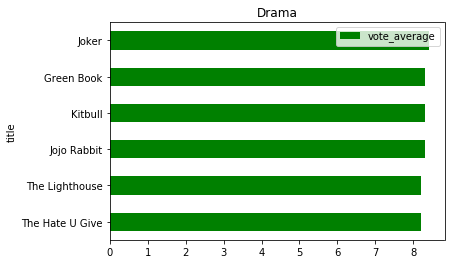

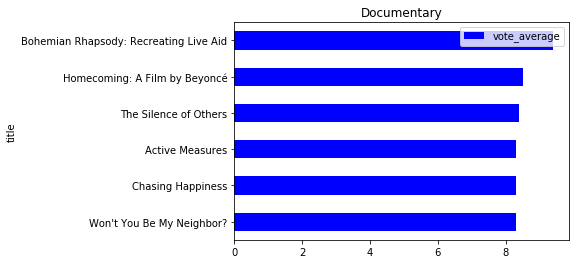

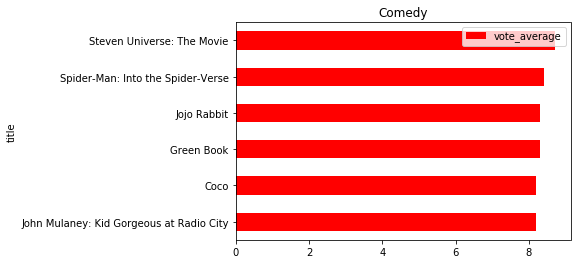

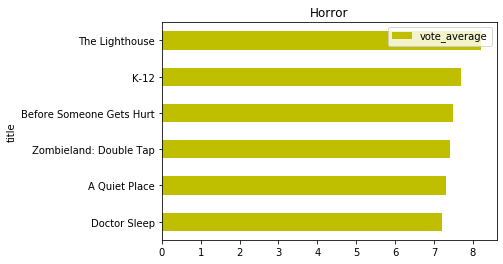

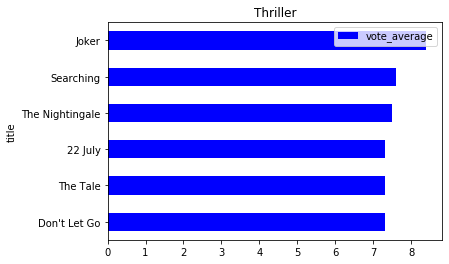

In [11]:
#4. top 6 movies (by rating) for top 6 genres from above chart

df_plot_genre= cleaned_data.merge(genre_df, left_on='id', right_on='movie_id').merge(prod_country_df,left_on = 'id', right_on='movie_id')
df_plot_genre = df_plot_genre[df_plot_genre.vote_count > 10]
df_plot_genre = df_plot_genre[df_plot_genre.production_country == 'United States of America']

df_plot_drama = df_plot_genre[df_plot_genre.genre_name == 'Drama'].sort_values(by='vote_average', ascending=False)
df_plot_drama = df_plot_drama[0:6][['title','vote_average']]

df_plot_docu = df_plot_genre[df_plot_genre.genre_name == 'Documentary'].sort_values(by='vote_average', ascending=False)
df_plot_docu = df_plot_docu[0:6][['title','vote_average']]

df_plot_comedy = df_plot_genre[df_plot_genre.genre_name == 'Comedy'].sort_values(by='vote_average', ascending=False)
df_plot_comedy = df_plot_comedy[0:6][['title','vote_average']]

df_plot_horror = df_plot_genre[df_plot_genre.genre_name == 'Horror'].sort_values(by='vote_average', ascending=False)
df_plot_horror = df_plot_horror[0:6][['title','vote_average']]

df_plot_thriller = df_plot_genre[df_plot_genre.genre_name == 'Thriller'].sort_values(by='vote_average', ascending=False)
df_plot_thriller = df_plot_thriller[0:6][['title','vote_average']]

graph1 = df_plot_drama.sort_values(by='vote_average', ascending=True).plot(kind='barh', x='title', title='Drama', color='g')
fig = graph1.get_figure()
fig.savefig("graph1.png",bbox_inches='tight')
graph2 = df_plot_docu.sort_values(by='vote_average', ascending=True).plot(kind='barh', x='title', title='Documentary', color='b')
fig = graph2.get_figure()
fig.savefig("graph2.png",bbox_inches='tight')

graph3 = df_plot_comedy.sort_values(by='vote_average', ascending=True).plot(kind='barh', x='title', title='Comedy', color='r')
fig = graph3.get_figure()
fig.savefig("graph3.png",bbox_inches='tight')

graph4 = df_plot_horror.sort_values(by='vote_average', ascending=True).plot(kind='barh', x='title', title='Horror', color='y')
fig = graph4.get_figure()
fig.savefig("graph4.png",bbox_inches='tight')

graph5 = df_plot_thriller.sort_values(by='vote_average', ascending=True).plot(kind='barh', x='title', title='Thriller', color='b')
fig = graph5.get_figure()
fig.savefig("graph5.png",bbox_inches='tight')


In [12]:
#4.Word Cloud
g_id = list(genre_df.genre_id.unique())
#We want to extract the movie ids for each genres
m_g_list=[]
for i in g_id: #g_id is extracted from genres API
    m_id=[]
    for j in range(len(genre_df['genre_id'])):
        if i == genre_df['genre_id'][j]:
            m_id.append(genre_df['movie_id'][j])
    m_g_list.append(m_id)

#getting overviews by genre
overview_list = {} 
regex = re.compile('[%s]' % re.escape(string.punctuation))

count=0
for i in range(len(m_g_list)):
    overview_g=''
    for j in m_g_list[i]:
        overview_g+=overview_df['overview'][j]
    overview_list[g_id[count]] = regex.sub("", overview_g).lower()
    count+=1
#     print('count',count)
    
def shaped_wordcloud(g_id, pic):
    wordnet_lemmatizer = WordNetLemmatizer()
    stopword_list = stopwords.words('english')    
    tokens = nltk.word_tokenize(overview_list[g_id])    
    tokens = [token.strip() for token in tokens]    
    text=[token for token in tokens if token not in stopword_list]
    lemma=' '.join(wordnet_lemmatizer.lemmatize(word, pos="v") for word in text)
    char_mask = np.array(Image.open(pic))
    image_colors = ImageColorGenerator(char_mask)
    wc = w.WordCloud(background_color="white",max_font_size=1000,max_words= 100,width=800,height=400,mask=char_mask, random_state=1).generate(lemma)
    plt.figure(figsize=(12,10))
    plt.imshow(wc.recolor(color_func=image_colors),interpolation="bilinear")
    plt.axis('off')
    plt.show()

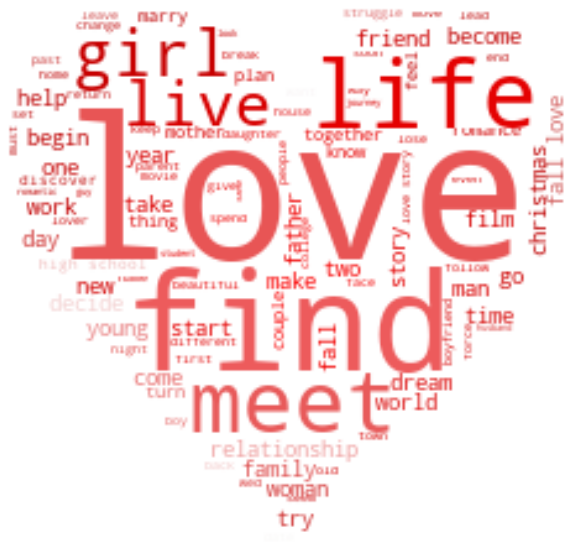

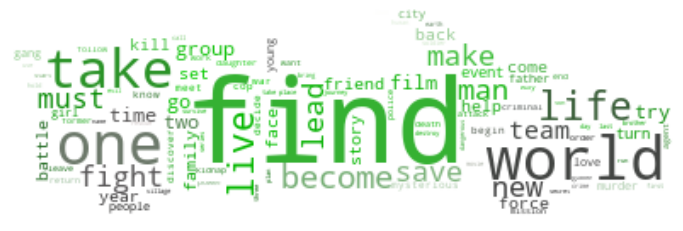

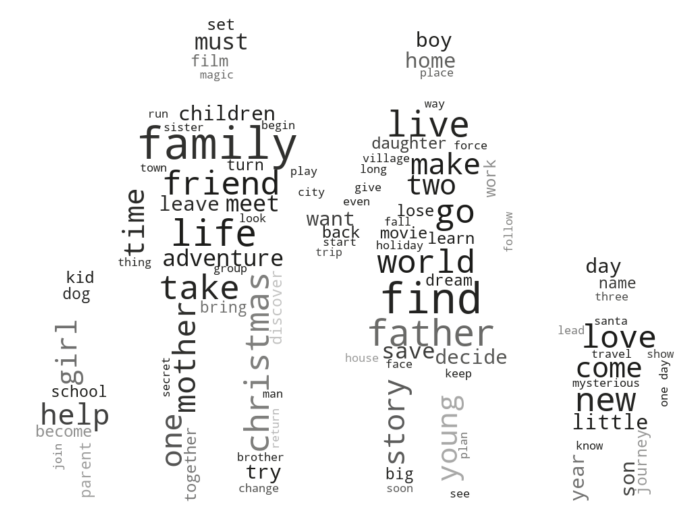

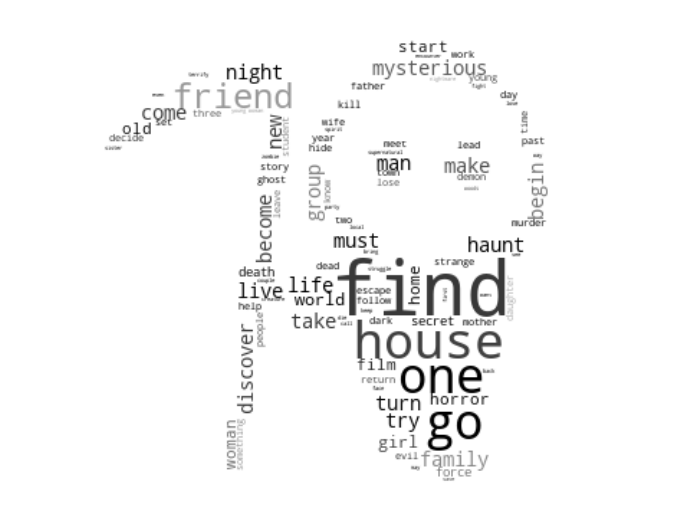

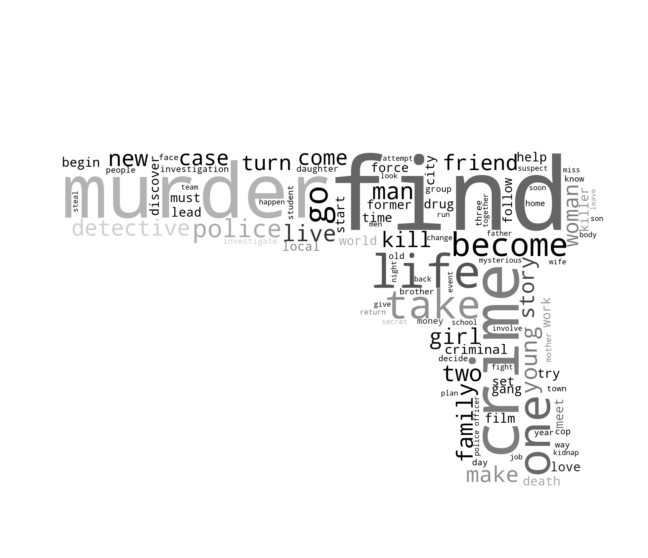

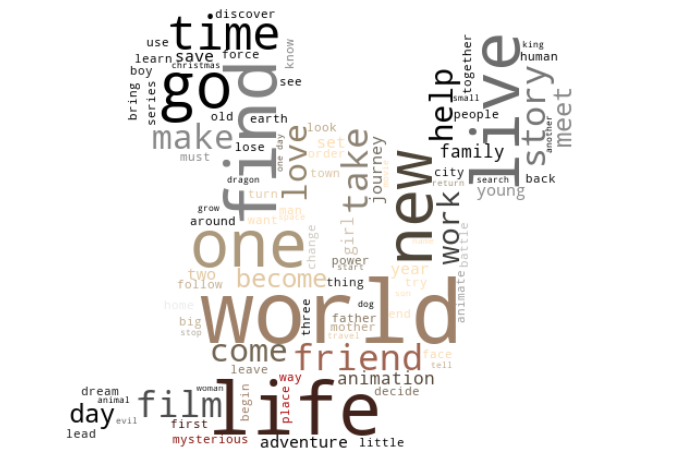

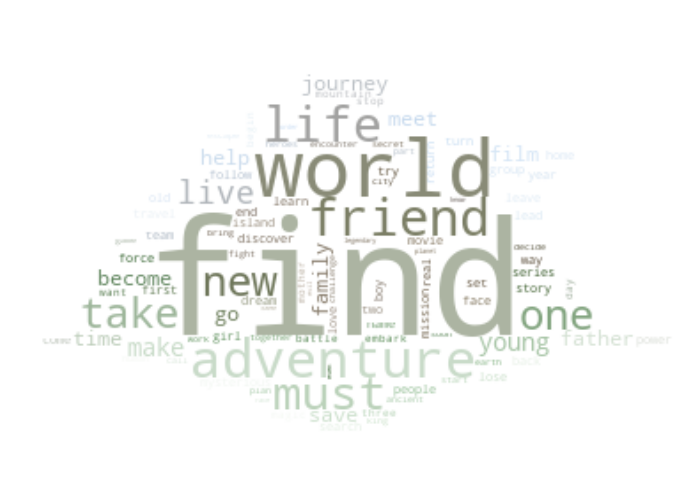

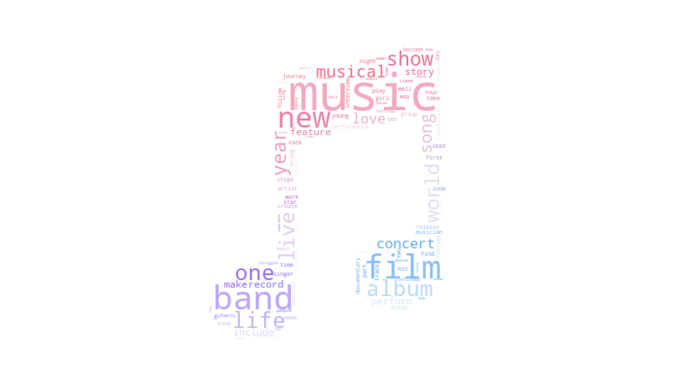

In [13]:
#4a. Romance
shaped_wordcloud(10749,"heart.jpeg")
#4b. Action
shaped_wordcloud(28,"action.jpeg")
#4c. Family
shaped_wordcloud(10751,"family.JPG")
#4d. Horror
shaped_wordcloud(27,"horror.jpg")
#4e. Crime
shaped_wordcloud(80,"crime_1.jpg")
#4f. Animation
shaped_wordcloud(16,"animation.jpg")
#4g. Adventure
shaped_wordcloud(12,"adventure.jpg")
#4h. Music
shaped_wordcloud(10402,"music.jpg")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning:

`item` has been deprecated and will be removed in a future version



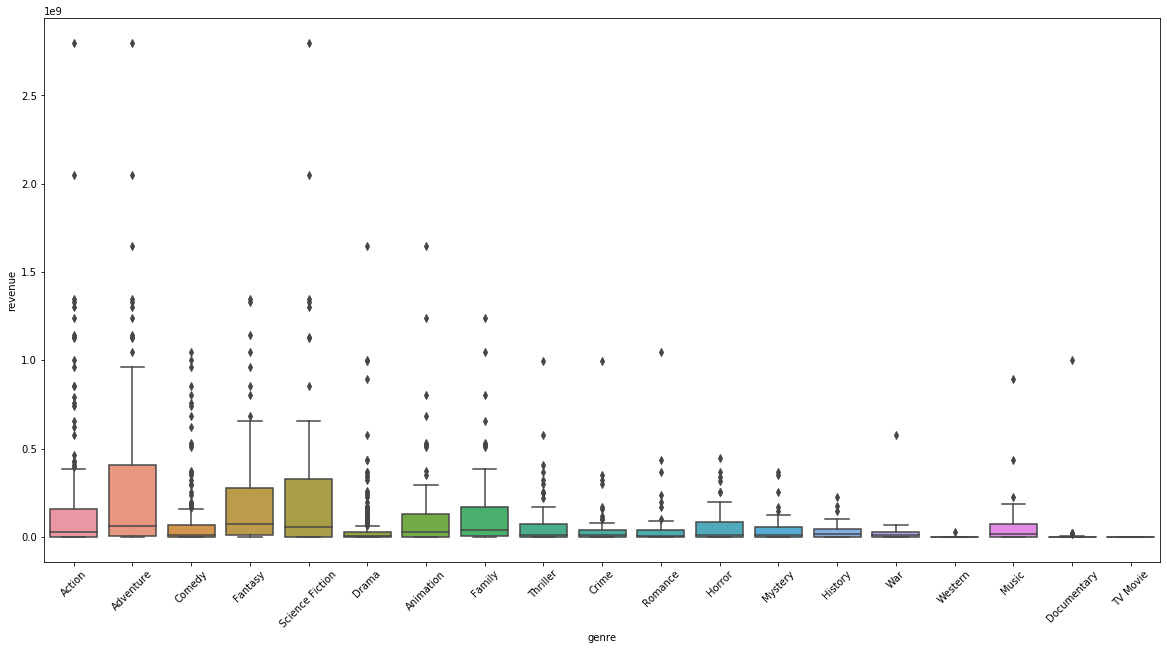

In [14]:
#5. Box plot for revenues by genre

import seaborn as sns
import matplotlib.pyplot as plt
rev_list=[]
for i in range(len(genre_df)):
    temp_id = genre_df.iloc[i]['movie_id']
    rev_list.append(cleaned_data[cleaned_data['id']==temp_id]['revenue'].item())
genre_rev_df = pd.DataFrame()
genre_rev_df['movie_id']= genre_df['movie_id']
genre_rev_df['genre'] = genre_df['genre_name']
genre_rev_df['revenue']= rev_list
genre_rev_df_1 = genre_rev_df[genre_rev_df.revenue != 0.0]
fig, ax = plt.subplots(figsize =(20, 10)) 
chart =sns.boxplot(ax=ax,data = genre_rev_df_1, x = genre_rev_df_1["genre"],y = genre_rev_df_1["revenue"])
labels =chart.get_xticklabels()
chart.set_xticklabels(labels,rotation=45)
fig = chart.get_figure()
fig.savefig("graph.png",bbox_inches='tight')

<h1><strong>Model 1 : Shortest Path</strong></h1>

In [15]:
#final tweaks
movie_genre_df = genre_df.groupby(['movie_id', 'genre_name']).size().unstack()
movie_genre_df = movie_genre_df.fillna(0)

def create_network_dictionary(ids):
    genre_list = list(genre_df[genre_df.movie_id == ids]['genre_name'])
    director_list = list(director_df[director_df.movie_id == ids]['director_name'])
    cont_list = list(prod_country_df[prod_country_df.movie_id ==ids]['production_country'])
    sample_network = {}
    sample_director = {}
    sample_country={}
    
    for row1 in genre_df.itertuples(index=False):
        if row1[2] in genre_list and ids != row1[0]:
            if (ids, row1[0]) not in sample_network:
                sample_network[(ids, row1[0])] = 1
            else:
                sample_network[(ids, row1[0])] += 1
        
    for row1 in director_df.itertuples(index=False):
        if row1[1] in director_list and ids != row1[0]:
            if (ids, row1[0]) not in sample_director:
                sample_director[(ids, row1[0])] = 1
            else:
                sample_director[(ids, row1[0])] += 1  
                
     
    for row1 in prod_country_df.itertuples(index=False):
        if row1[1] in cont_list and ids != row1[0]:
            if (ids, row1[0]) not in sample_country:
                sample_country[(ids, row1[0])] = 1
            else:
                sample_country[(ids, row1[0])] += 1  
                
    for (key1,key2),value in sample_network.items():
        a = movie_genre_df.loc[[key1, key2],].sum()
        a = np.where(a>=1,1,0)
        counts = a.sum()
        sample_network[key1, key2] = (value/counts)*0.60
        
    for (key1,key2),value in sample_network.items():
        if (key1,key2) in sample_director:
            sample_network[key1, key2] = value + 0.20
        if (key1,key2)in sample_country:
            sample_network[key1, key2] = value + 0.20
            
    for (key1,key2),value in sample_network.items():
        sample_network[key1, key2] = 1 - value
   
    return sample_network

In [16]:
def shortest_path_model(df):
    print("Find Recommendations Based on Movie Input")
    x=0
    while x<4:
        movie = input("Type name of a movie you liked: " )
        sleep(1)
        try:
            if movie.lower() in list(map(lambda x:x.lower(),list(df['title']))):
                print("Getting your recommendations")
            row = df.loc[df['title'].str.lower()==movie.lower()]
            ids = np.array(row['id'])[0]
            network_dictionary = create_network_dictionary(ids)

            dict_rec = {}
            for key,value in network_dictionary.items():
                dict_rec[key[1]] = value
            dict_rec = sorted(dict_rec.items(), key=lambda x:x[1], reverse=False)
            Recommended_movies = []
            for x in dict_rec[0:5]:
                Recommended_movies.extend(np.array(df.loc[df['id']==x[0]]['title']))

            return Recommended_movies
        except:
            x +=1
            print("""We dont recognize that movie, make sure that: 
                (1) the name is correctly spelled and;
                (2) the movie was released in past 2 years""")
            continue
    else:
        print('Exceeded the limit of 4 attempts')

If you wish to run the shortest path model, please uncomment the next code block

In [18]:
# shortest_path_model(cleaned_data)

<h1> Model 2</h2>
Cosine Similarity

In [19]:
features = ['genres','crew','overview']

title_dict = {}
overview_dict ={}
genres_dict={}
director_dict={}

for i in range(len(cleaned_data)):
    temp_id = cleaned_data.iloc[i]['id']
    
    #overview
    overview_dict[temp_id] = cleaned_data.iloc[i]['overview']
    
    #genres
    genre =''
    for d in cleaned_data.iloc[i]['genres']:
        genre = genre+ " "+ d['name']   
    genres_dict[temp_id] =genre
    
    #directors
    director =''
    for d in cleaned_data.iloc[i]['crew']:
        if d['job'] == 'Director':
            director = director+ " "+ d['name']
    director_dict[temp_id] =director
    
    #title
    title_dict[temp_id] = cleaned_data.iloc[i]['title']
    
string_overview_df= pd.DataFrame.from_dict(overview_dict, orient='index', columns = ['overview'])
string_genre_df= pd.DataFrame.from_dict(genres_dict, orient='index', columns = ['genres'])
string_director_df= pd.DataFrame.from_dict(director_dict, orient='index', columns = ['director'])   
title_df= pd.DataFrame.from_dict(title_dict, orient='index', columns = ['title'])   

In [20]:
cosine_df = string_genre_df.join(string_director_df).join(title_df).join(string_overview_df)
cosine_df.reset_index(inplace=True)
cosine_df.reset_index(inplace=True)
cosine_df = cosine_df.rename(columns={'index':'movie_id', 'level_0':'index'})

In [21]:
def get_title_from_index(index):
    return cosine_df[cosine_df.index == index]["title"].values[0]

def get_index_from_title(title):
    return cosine_df[cosine_df['title'] == title].index[0]

def combine_features(row):
    try:
        return row["genres"]+" "+row["director"]+" "+row['overview']
    except:
        print ('Error:', row)
        
def filtering(row):
    if len(row["genres"])>0 and len(row["director"])>0 and len(row["overview"])>0:
        return row
    else:
        None


In [22]:
def cosine_movie_title_model(df):

    movie_user_likes = input("Type name of movie you liked: " )
    try:
        if movie_user_likes.lower() in list(map(lambda x:x.lower(),list(df['title']))):
            print("Getting your recommendations")

    ##Step 1: Filter out data that has all non-empty 'feature' columns    
        result_df= df.apply(filtering,axis=1)

##Movie for which user needs recommendation    
    ##Step 2: Select Features
        features = ['genres','director','overview']

    ##Step 3: Create a column in DF which combines all selected features
        for feature in features:
            result_df[feature] = result_df[feature].fillna('')    

    ##Step 4: 'combined_features' column has the combined string 
        result_df["combined_features"] = result_df.apply(combine_features,axis=1)

    ##Step 5: Create count matrix from this new combined column
        cv = CountVectorizer()
        count_matrix = cv.fit_transform(result_df["combined_features"])

    ##Step 6: Compute the Cosine Similarity based on the count_matrix
        cosine_sim = cosine_similarity(count_matrix) 

    ##Step 7: Get index of this movie from its title
        movie_index = get_index_from_title(movie_user_likes)
        similar_movies =  list(enumerate(cosine_sim[movie_index]))

    ##Step 8: Get a list of similar movies in descending order of similarity score
        sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)

    ##Step 9: Print titles of first 50 movies
        i=0
        for element in sorted_similar_movies:
            print (get_title_from_index(element[0]))
            i=i+1
            if i>5:
                break
    except:
        print("""We dont recognize that movie, make sure that: 
                (1) the name is correctly spelled and;
                (2) the movie was released in past 2 years""")

If you wish to run the cosine model, please uncomment the next code block.

In [ ]:
# cosine_movie_title_model(cosine_df)

<h1>Model 3 Keyword Search</h1>

TF-IDF Model

In [23]:
df=overview_df.copy()
def get_clean_overview():
    overview_index=df['overview'].index
    id_overview=[]
    for i in range(len(df['overview'])):
        id_overview.append([overview_index[i],df['overview'][overview_index[i]]])
    #removing punctuations and making them lowercase 
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    for i in id_overview:
        if i[1]:
            i[1]=regex.sub("",i[1]).lower()
            i[1]=re.sub(r'[^\x00-\x7F]+','',i[1]) #removing non ascii characters
    wordnet_lemmatizer = WordNetLemmatizer()
    stopword_list = stopwords.words('english')    
    for i in id_overview:
        if i[1]: 
            tokens = nltk.word_tokenize(i[1])    
            tokens = [token.strip() for token in tokens]    
            text=[token for token in tokens if token not in stopword_list]
            lemma=[wordnet_lemmatizer.lemmatize(word, pos="v") for word in text]
            i[1]=lemma
    #now we make a dictionary of each overview, i.e. each word with an id 
    single_overview=[]
    for i in id_overview:
        if i[1]:
            single_overview.append(i[1])
    titles=[]
    for i in id_overview:
        if i[1]:
            titles.append(df.title[i[0]])
    return single_overview,titles 

In [24]:
#function to make the corpora, titles for all movies in the data set that have a genre 
def make_corpora():
    single_overview,titles = get_clean_overview()
    dictionary = Dictionary(single_overview)
    corpus = [dictionary.doc2bow(doc) for doc in single_overview] #creating a corpus or bag of words for each movie
    from gensim.models.tfidfmodel import TfidfModel
    tfidf = TfidfModel(corpus)
    from gensim.similarities import MatrixSimilarity
    sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))
    
    return tfidf, sims, titles, dictionary

In [25]:
#now we create a function to accept search words and then show the top 4 similar movies using the tfidf model
def tf_idf_model(search_words):
    m_overview=search_words
    tfidf, sims, titles,dictionary= make_corpora() #make corpus of all movies
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    m_overview = regex.sub("",m_overview).lower()
    m_overview=re.sub(r'[^\x00-\x7F]+','',m_overview)
    wordnet_lemmatizer = WordNetLemmatizer()
    stopword_list = stopwords.words('english')
    #m_overview=m_overview.split(' ')
    tokens = nltk.word_tokenize(m_overview)    
    tokens = [token.strip() for token in tokens]    
    text=[token for token in tokens if token not in stopword_list]
    lemma=[wordnet_lemmatizer.lemmatize(word, pos="v") for word in text]
    m_overview=lemma
    
    doc_bow = dictionary.doc2bow(m_overview)
    doc_tfidf = tfidf[doc_bow]
    similarity_array = sims[doc_tfidf]
   
    similarity_series = pd.Series(similarity_array.tolist(), index=titles)
    top_hits = similarity_series.sort_values(ascending=False)[0:5]
    
    return top_hits

If you wish to run tf_idf model, please uncomment the below code block.

In [ ]:
# tf_idf_model('snow christmas')

Cosine Similarity Model

In [37]:
def cosine_keyword_model_part1(search_words):
    list_of_strings=[]
    single_overview, titles = get_clean_overview()
    for i in single_overview:
        list_of_strings.append(','.join(i)) #each string in the list is overview for a single movie
    list_of_strings.insert(0,search_words) #adding the search words to get the similarity row for these with movies
    #print(list_of_strings)
    cv = CountVectorizer(list_of_strings)
    count_matrix = cv.fit_transform(list_of_strings).toarray()
    cosine_sim = cosine_similarity(count_matrix)
    sim_d={}
    for i in range(len(cosine_sim[0])):
        sim_d[i]=cosine_sim[0][i] #extracting the row of search words and putting into dictionary
    sorted_similar_movies = sorted(sim_d.items(),key=lambda x:x[1],reverse=True)[1:6]
    recommendation=[]
    for i in sorted_similar_movies:
        recommendation.append((titles[i[0]-1],i[1]))
    return recommendation



def get_clean_overview_for_genre(g_id):
    overview_index=df['overview'].index
    id_overview_genre=[]
    for i in range(len(df['overview'])):
        id_overview_genre.append([overview_index[i],df['overview'][overview_index[i]],df['genres'][overview_index[i]]]) 
    for i in id_overview_genre:
        l=[]
        for j in i[2]:
            l.append(j['id'])
        i[2]=l
    id_overview_genre_specific=[]
    for i in id_overview_genre:
        if g_id in i[2]:
            id_overview_genre_specific.append(i)
    
    
    #removing punctuations and making them lowercase 
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    for i in id_overview_genre_specific:
        if i[1]:
            i[1]=regex.sub("",i[1]).lower()
            i[1]=re.sub(r'[^\x00-\x7F]+','',i[1]) #removing non ascii characters
    wordnet_lemmatizer = WordNetLemmatizer()
    stopword_list = stopwords.words('english')    
    for i in id_overview_genre_specific:
        if i[1]: 
            tokens = nltk.word_tokenize(i[1])    
            tokens = [token.strip() for token in tokens]    
            text=[token for token in tokens if token not in stopword_list]
            lemma=[wordnet_lemmatizer.lemmatize(word, pos="v") for word in text]
            i[1]=lemma
    
    single_overview=[]
    for i in id_overview_genre_specific:
        if i[1]:
            single_overview.append(i[1])
    titles=[]
    for i in id_overview_genre_specific: #getting movie titles 
        if i[1]:
            titles.append(df.title[i[0]])
    return single_overview, titles


def cosine_keyword_model_part2(search_words,g_id):
    list_of_strings=[]
    single_overview, titles = get_clean_overview_for_genre(g_id)
    for i in single_overview:
        list_of_strings.append(','.join(i)) #each string in the list is overview for a single movie
    list_of_strings.insert(0,search_words) #adding the search words to get the similarity row for these with movies
    #print(list_of_strings)
    cv = CountVectorizer(list_of_strings)
    count_matrix = cv.fit_transform(list_of_strings).toarray()
    cosine_sim = cosine_similarity(count_matrix)
    sim_d={}
    for i in range(len(cosine_sim[0])):
        sim_d[i]=cosine_sim[0][i] #extracting the row of search words and putting into dictionary
    sorted_similar_movies = sorted(sim_d.items(),key=lambda x:x[1],reverse=True)[1:6]
    recommendation=[]
    for i in sorted_similar_movies:
        recommendation.append((titles[i[0]-1],i[1]))
    return recommendation


def cosine_keyword_model_combined(search_words,g_id=0):
    if g_id==0:
        movies =cosine_keyword_model_part1(search_words)
    else:
        movies =cosine_keyword_model_part2(search_words,g_id)
    return movies



def cosine_keyword_model():
    genres = genre_df[['genre_id', 'genre_name']].drop_duplicates(subset='genre_id')
    genres = genres.set_index('genre_id')
    print('You can search by only keywords or keywords & genre')
    sleep(1)
    print('Please note if you choose to search without limiting on genres, the model will take longer to return results.')
    sleep(1)
    ans=input('Do you wish to search by genre [Y/N]:')
    if ans.lower() == 'y':
        print('Here is the genre list')
        print(genres)
        gen_id= input('Enter your selected genre id:')
        gen_id= int(gen_id)
        try:
            selected_genre=genres[genres.index==int(gen_id)].iloc[0]
            print('You have selected',selected_genre[0])
            sleep(1)
            search_words=input('Enter the keywords you want to search with (e.g. snow love):')
            print('Getting your recommendations...')
            movies= cosine_keyword_model_combined(search_words,gen_id)
            movies_1 = []
            for i in movies:
                movies_1.append(i[0]) 
        except IndexError:
            print('Selected genre does not exist!')
    elif ans.lower() == 'n':
        search_words=input('Enter the keywords you want to search with:')
        print('Getting your recommendations...')
        movies= cosine_keyword_model_combined(search_words)
        movies_1 = []
        for i in movies:
            movies_1.append(i[0])
    else:
        print('Invalid entry. Please run the model again.')
    return movies_1

If you wish to run cosine keyword model, please uncomment the below code block.

In [38]:
# cosine_keyword_model()

<h1>Final Project Model</h1>

In [39]:
def SME_recommendation_tool():
    print('Its movie time! Lets save 51 minutes of your life!')
    sleep(1)
    search_input = input('Would you like to search by movie title [1] or keywords[2]? Please enter your option number:')
    if search_input == '1':
        return shortest_path_model(cleaned_data)
    elif search_input == '2':
        return cosine_keyword_model()
    else:
        print('Invalid entry, try again.')
        
    

In [40]:
SME_recommendation_tool()

Its movie time! Lets save 51 minutes of your life!
Would you like to search by movie title [1] or keywords[2]? Please enter your option number:2
You can search by only keywords or keywords & genre
Please note if you choose to search without limiting on genres, the model will take longer to return results.
Do you wish to search by genre [Y/N]:y
Here is the genre list
               genre_name
genre_id                 
16              Animation
12              Adventure
10751              Family
14                Fantasy
28                 Action
35                 Comedy
878       Science Fiction
18                  Drama
53               Thriller
80                  Crime
10402               Music
10749             Romance
27                 Horror
9648              Mystery
36                History
10752                 War
37                Western
10770            TV Movie
99            Documentary
Enter your selected genre id:99
You have selected Documentary
Enter the keywords you 

['Docstop: Rakkaani WTC',
 'Livets pris',
 'Marianne & Leonard: Words of Love',
 "Can't Nobody Else Love You",
 'Dark Horizon']